In [1]:
# SIMPLE LINEAR REGRESSION

In [17]:
import pandas as pd# helps to read dataset from different sources
import numpy as np 
import matplotlib.pyplot as plt# for visualization

In [18]:
df=pd.read_csv('height-weight.csv')

In [20]:
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


# find how the independent and dependent are releated to each other

Text(0, 0.5, 'height')

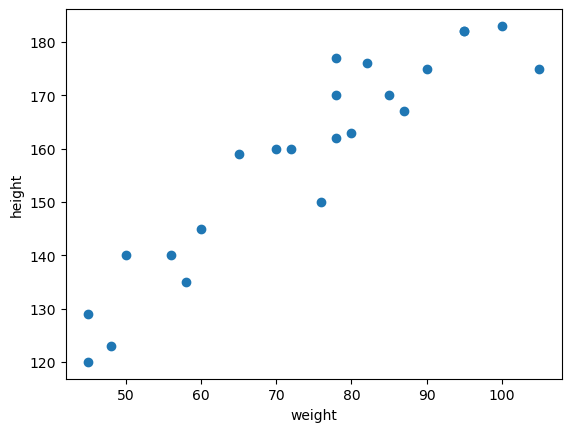

In [6]:
# scatter plot to find correlation

plt.scatter(df['Weight'],df['Height'])# these represent the truth points
plt.xlabel("weight")# labeling the graph
plt.ylabel("height")
# weight incresing height incresing --->linear relationship

In [7]:
# corelation between x and y coordinates 
df.corr()#--->linear regression--->highly corealated

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


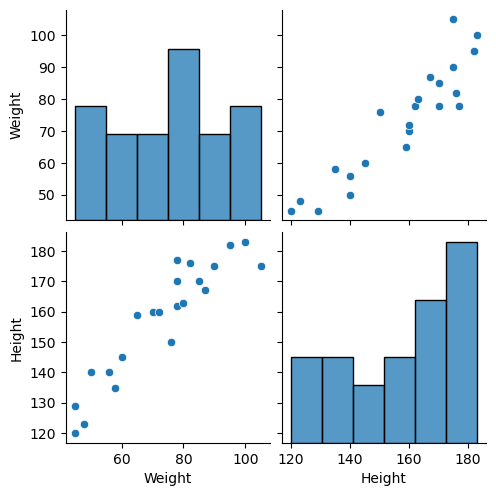

In [8]:
# seaborn for visualisation
import seaborn as sns
sns.pairplot(df)

In [9]:
# indepent and dependent feature --->linearly correalted
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [16]:
X_seris=df['Weight']
X_seris.shape# using this series one inorder to understand the difference 

(23,)

In [15]:
X=df[['Weight']]# always must --->>>independednt feature should be always in data frame or 2d array
X.shape

(23, 1)

In [21]:
y=df['Height']# output feature can be in series form or one d array
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [ ]:
## train and test split
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [26]:
X_train.shape

(17, 1)

In [ ]:
# standardization 
# x claculated with KGs
# y claculated with cm

In [ ]:
# we actually change the independent feature make it go through z score in order standardize it
# becuz the gradient decent applies on the independent feature that is the reason we require to standardize the independent 
# faeture

In [ ]:
# normalize the data points

In [ ]:
from sklearn.preprocessing import StandardScaler# this class is being imported 

In [28]:
sclear=StandardScaler()# mean would be 0 and standard dev= sigma sq.# object is created 
sclear.fit_transform(X_train) # methord function is being called

array([[ 1.38190105],
       [-0.74879754],
       [ 0.56240159],
       [-0.63953095],
       [ 0.3438684 ],
       [ 0.12533521],
       [ 1.65506753],
       [-1.34976381],
       [ 1.92823402],
       [-0.25709787],
       [ 0.67166818],
       [-0.53026435],
       [-1.07659733],
       [-1.18586392],
       [-1.34976381],
       [ 0.45313499],
       [ 0.01606862]])

In [ ]:
X_train=sclear.fit_transform(X_train)
# learn aabout fit_transform and transform
# data leakage and how it effects

In [31]:
X_test=sclear.transform(X_test)
X_test

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-3.73276437],
       [-3.74768836],
       [-3.78350593],
       [-3.75664275],
       [-3.78350593],
       [-3.76261234]])

In [33]:
### apply simple linear regression
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [35]:
print(regression.coef_)## this will provide us with slope # slope would be one because only one feature is there 

[18.10063519]


In [ ]:
m=regression.coef_
# what does this means one unit movement in x val will result in 18.10063519 unit movement in y value

In [41]:
regression.intercept_

153.05882352941177

In [ ]:
intercept=regression.intercept_
# the moment when your weight value is 0 .the height is value is this

plotting best fit line wrt to training data

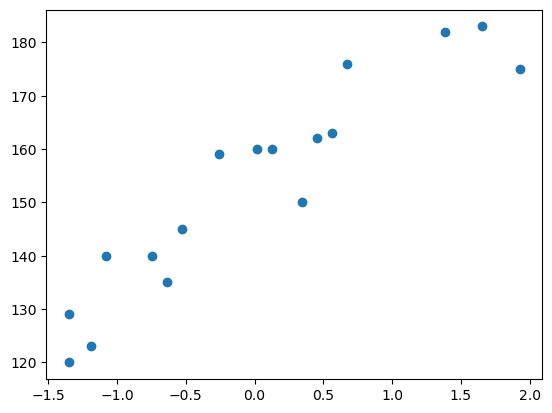

In [39]:
plt.scatter(X_train,y_train)

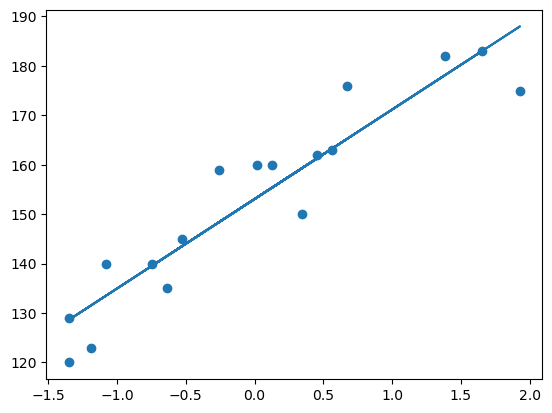

In [42]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))

In [44]:
# prediction for the test data
y_pred=regression.predict(X_test)

In [47]:
# perfromance metric
from sklearn.metrics import mean_squared_error,mean_absolute_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
print(mse)
print(mae)

7860.0227832071
88.51983651459436


In [48]:
# ols linear regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [49]:
model.predict(X_test)

array([-67.56540616, -67.83553978, -68.48386048, -67.99761996,
       -68.48386048, -68.10567341])

In [51]:
model.summary()

c:\Users\ASUS\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.014
Model:                            OLS   Adj. R-squared (uncentered):             -0.048
Method:                 Least Squares   F-statistic:                             0.2233
Date:                Sat, 13 Sep 2025   Prob (F-statistic):                       0.643
Time:                        22:25:47   Log-Likelihood:                         -109.66
No. Observations:                  17   AIC:                                      221.3
Df Residuals:                      16   BIC:                                      222.2
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            18.1006     38.303      0.473      0.643     -63.098      99.300
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.747
Skew:                          -0.248   Prob(JB):                        0.688
Kurtosis:                       2.100   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
# how to predict for new data

regression.predict(sclear.transform([[72]]))

c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.32747046])